# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

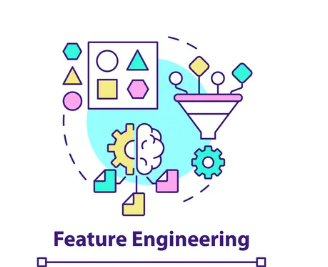

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [17]:
# Write your solution here
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
df= pd.read_csv("loan_train.csv")
ndf= df.select_dtypes(include='number')
ndf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [18]:
impute= SimpleImputer(strategy='mean')
data= impute.fit_transform(ndf)
data

array([[5.84900000e+03, 0.00000000e+00, 1.46412162e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 1.50800000e+03, 1.28000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [3.00000000e+03, 0.00000000e+00, 6.60000000e+01, 3.60000000e+02,
        1.00000000e+00],
       ...,
       [8.07200000e+03, 2.40000000e+02, 2.53000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [7.58300000e+03, 0.00000000e+00, 1.87000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 0.00000000e+00, 1.33000000e+02, 3.60000000e+02,
        0.00000000e+00]])

In [20]:
nudf= pd.DataFrame(data,columns=ndf.columns)
nudf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0  146.412162             360.0   
1             4583.0             1508.0  128.000000             360.0   
2             3000.0                0.0   66.000000             360.0   
3             2583.0             2358.0  120.000000             360.0   
4             6000.0                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0   71.000000             360.0   
610           4106.0                0.0   40.000000             180.0   
611           8072.0              240.0  253.000000             360.0   
612           7583.0                0.0  187.000000             360.0   
613           4583.0                0.0  133.000000             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [21]:
nudf.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

C:\Users\Lab-2\anaconda3\deskyop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


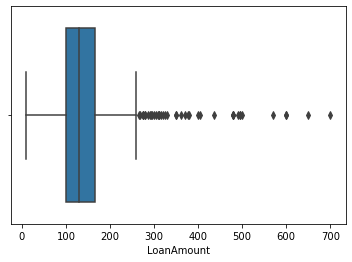

In [22]:
#Write your solution here
import seaborn as sb 
import matplotlib.pyplot as plt
p= nudf['LoanAmount']
sb.boxplot(p)
plt.show()


In [23]:
Q1 = nudf.LoanAmount.quantile(0.25)
Q3 = nudf.LoanAmount.quantile(0.75)
IQR = Q3-Q1
upperLimit =Q3+(IQR*1.5)
lowerLimit= Q1-(IQR*1.5)

In [24]:
df1=nudf[(nudf.LoanAmount>lowerLimit)&(nudf.LoanAmount<upperLimit)]
df1.shape

(573, 5)

C:\Users\Lab-2\anaconda3\deskyop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

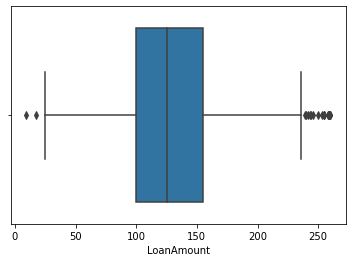

In [56]:
sb.boxplot(df1['LoanAmount'])

In [64]:
# standard deviation
#LoanAmou

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

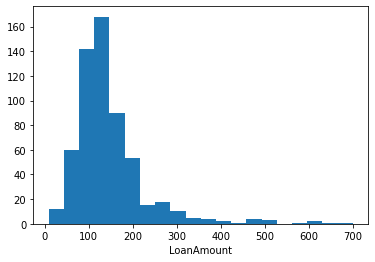

In [25]:
plt.hist(df.LoanAmount,bins=20)
plt.xlabel('LoanAmount')
plt.show()

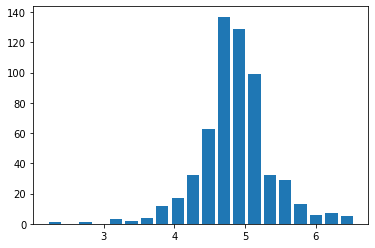

In [26]:
#after applying log transformation
x = np.log(df['LoanAmount'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

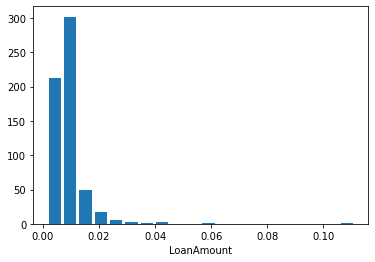

In [27]:
# reciprocal transformation
x = np.reciprocal(df.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel('LoanAmount')
plt.show()

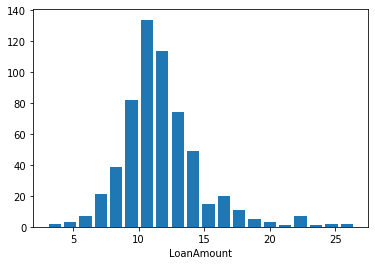

In [28]:
#square root 
x = np.sqrt(df.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel('LoanAmount')
plt.show()

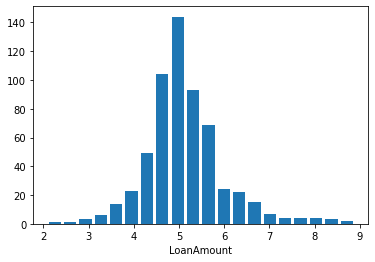

In [29]:
#cube
x = np.cbrt(df.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel('LoanAmount')
plt.show()

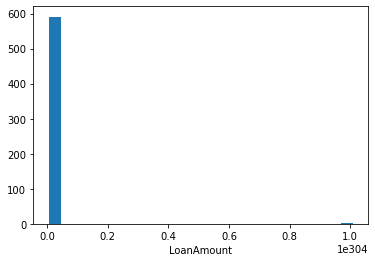

In [30]:
#exponential
x = np.exp(df.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel('LoanAmount')
plt.show()

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [31]:
# Min Max Scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
numeric = scaler.fit_transform(nudf)
numeric


array([[0.07048856, 0.        , 0.19885986, 0.74358974, 1.        ],
       [0.05482993, 0.03619171, 0.17221418, 0.74358974, 1.        ],
       [0.03525046, 0.        , 0.08248915, 0.74358974, 1.        ],
       ...,
       [0.09798392, 0.00575995, 0.35311143, 0.74358974, 1.        ],
       [0.09193568, 0.        , 0.25759768, 0.74358974, 1.        ],
       [0.05482993, 0.        , 0.17945007, 0.74358974, 0.        ]])

In [32]:
numricdf= pd.DataFrame(numeric,columns=nudf.columns)
numricdf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.070489           0.000000    0.198860           0.74359   
1         0.054830           0.036192    0.172214           0.74359   
2         0.035250           0.000000    0.082489           0.74359   
3         0.030093           0.056592    0.160637           0.74359   
4         0.072356           0.000000    0.191027           0.74359   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

In [34]:
#standard scaler
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
numeric = scaler.fit_transform(ndf)
standardf = pd.DataFrame(numeric,columns=nudf.columns)
standardf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487         NaN          0.276642   
1        -0.134412          -0.038732   -0.215309          0.276642   
2        -0.393747          -0.554487   -0.940328          0.276642   
3        -0.462062           0.251980   -0.308860          0.276642   
4         0.097728          -0.554487   -0.063289          0.276642   

   Credit_History  
0        0.432861  
1        0.432861  
2        0.432861  
3        0.432861  
4        0.432861

In [36]:
# Robust Scaler 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric = scaler.fit_transform(ndf)
roubustdf = pd.DataFrame(numeric,columns=nudf.columns)
roubustdf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.698029          -0.517358         NaN               0.0   
1         0.264096           0.139079    0.000000               0.0   
2        -0.278492          -0.517358   -0.911765               0.0   
3        -0.421422           0.509087   -0.117647               0.0   
4         0.749786          -0.517358    0.191176               0.0   

   Credit_History  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [37]:
# missing value: imputation
df1 = pd.read

NameError: name 'simpleImputer' is not defined

## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [67]:
#Write your solution here



# <center>THANK YOU